In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource

In [41]:
# Connect to PostgreSQL database
connection = psycopg2.connect(
    database="postgres",
    user="postgres",
    password="123",
    host="localhost",
    port="5432"
)

/var/folders/sf/8z2q6s016vq62qbq8kwlx8580000gn/T/ipykernel_71180/788594743.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


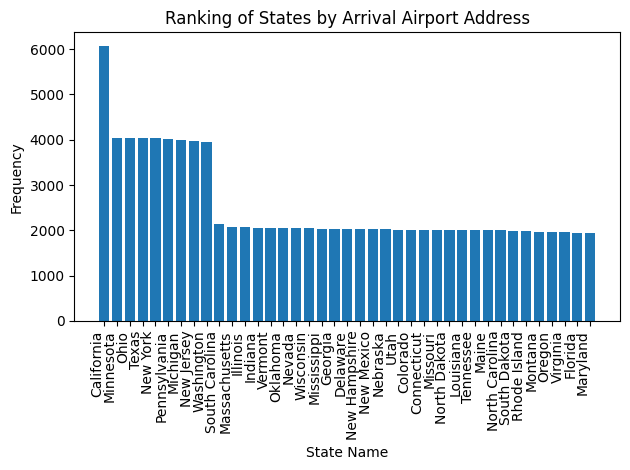

In [8]:
# Define the SQL query
query = """
SELECT RANK() OVER (ORDER BY COUNT(*) DESC) AS rank,
       a.state AS state_name,
       COUNT(*) AS frequency
FROM ticket t
JOIN address a ON t.arrival_airport_address = a.address_id
GROUP BY a.state
ORDER BY frequency DESC;
"""

# Read the data into a Pandas DataFrame
df = pd.read_sql_query(query, connection)

# Close the connection
connection.close()

# Plot the data using a bar chart
plt.bar(df['state_name'], df['frequency'])
plt.xlabel('State Name')
plt.ylabel('Frequency')
plt.title('Ranking of States by Arrival Airport Address')
plt.xticks(rotation=90, ha='right')  # Rotate the x-axis labels
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()

/var/folders/sf/8z2q6s016vq62qbq8kwlx8580000gn/T/ipykernel_71180/3862331218.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


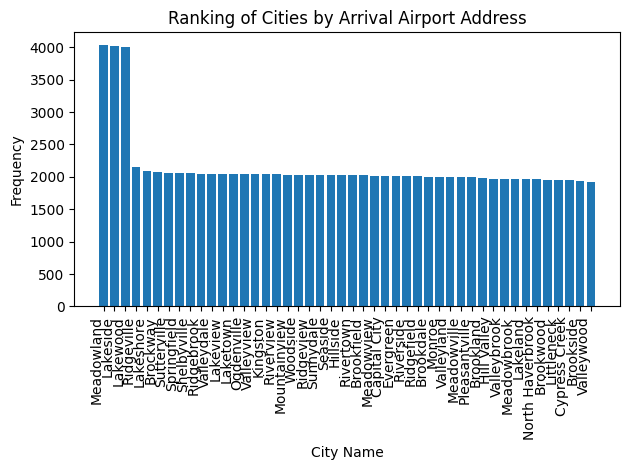

In [26]:
query = """
SELECT RANK() OVER (ORDER BY COUNT(*) DESC) AS rank,
       a.city AS city_name,
       COUNT(*) AS frequency
FROM ticket t
JOIN address a ON t.arrival_airport_address = a.address_id
GROUP BY a.city
ORDER BY frequency DESC;
"""

# Read the data into a Pandas DataFrame
df = pd.read_sql_query(query, connection)

# Close the connection
connection.close()

# Plot the data using a bar chart
plt.bar(df['city_name'], df['frequency'])
plt.xlabel('City Name')
plt.ylabel('Frequency')
plt.title('Ranking of Cities by Arrival Airport Address')
plt.xticks(rotation=90, ha='right')  # Rotate the x-axis labels
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()



/var/folders/sf/8z2q6s016vq62qbq8kwlx8580000gn/T/ipykernel_71180/280560573.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_hourly_rate = pd.read_sql('SELECT AVG(hourly_rate) AS avg_hourly_rate FROM vehicle', connection)['avg_hourly_rate'][0]
/var/folders/sf/8z2q6s016vq62qbq8kwlx8580000gn/T/ipykernel_71180/280560573.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_ticket_price = pd.read_sql('SELECT AVG(ticket_price) AS avg_ticket_price FROM ticket', connection)['avg_ticket_price'][0]
/var/folders/sf/8z2q6s016vq62qbq8kwlx8580000gn/T/ipykernel_71180/280560573.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or

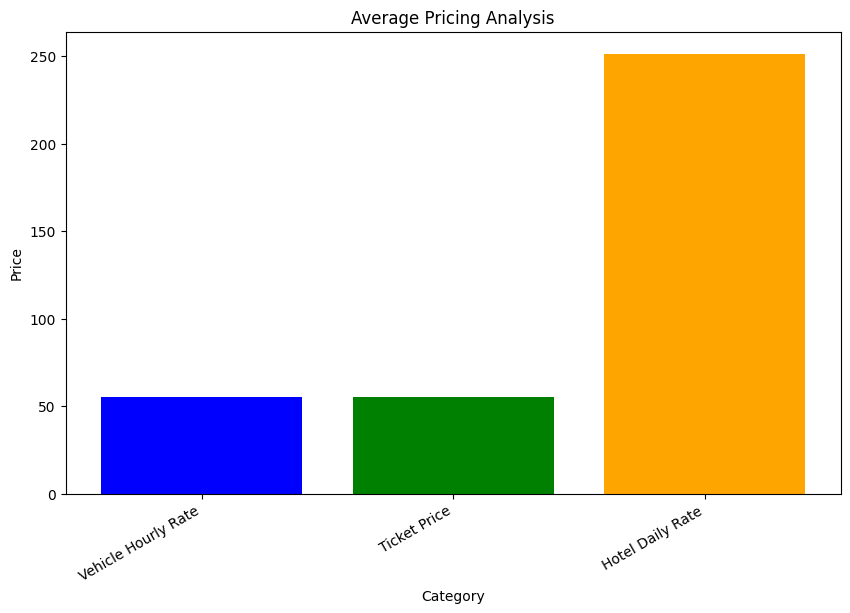

In [28]:
#Avergae Pricing analysis 

# Query for Average Hourly Rate for Vehicles
avg_hourly_rate = pd.read_sql('SELECT AVG(hourly_rate) AS avg_hourly_rate FROM vehicle', connection)['avg_hourly_rate'][0]

# Query for Average Ticket Price for Flights
avg_ticket_price = pd.read_sql('SELECT AVG(ticket_price) AS avg_ticket_price FROM ticket', connection)['avg_ticket_price'][0]

# Query for Average Daily Rate for Hotel Orders
avg_daily_rate = pd.read_sql('SELECT AVG(daily_rate) AS avg_daily_rate FROM hotel_order', connection)['avg_daily_rate'][0]

# Close the connection
connection.close()

# Create a DataFrame for Visualization
df = pd.DataFrame({
    'Category': ['Vehicle Hourly Rate', 'Ticket Price', 'Hotel Daily Rate'],
    'Average Price': [avg_hourly_rate, avg_ticket_price, avg_daily_rate]
})

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['Category'], df['Average Price'], color=['blue', 'green', 'orange'])
plt.title('Average Pricing Analysis')
plt.ylabel('Price')
plt.xlabel('Category')
plt.xticks(rotation=30, ha='right')
plt.show()


/var/folders/sf/8z2q6s016vq62qbq8kwlx8580000gn/T/ipykernel_71180/2959768504.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


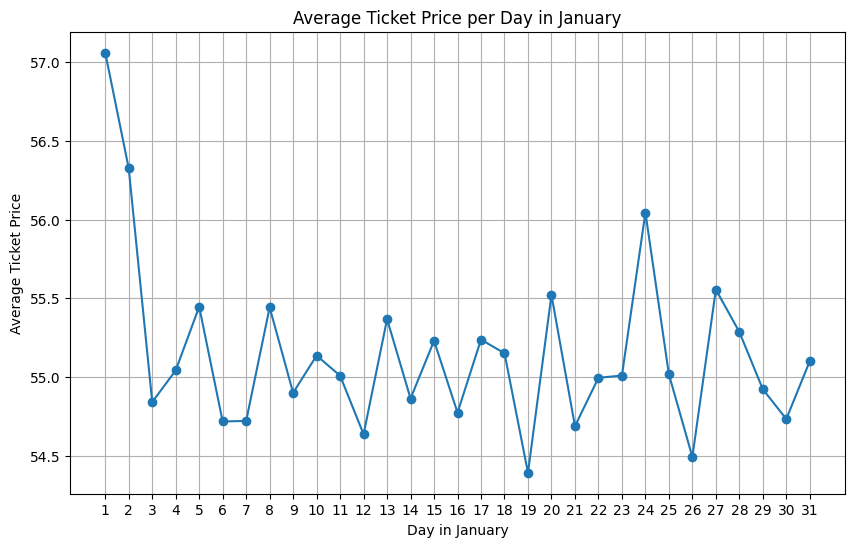

In [34]:
#Average Ticket Price per Day in January
# Execute the query
query = """
SELECT 
  EXTRACT(DAY FROM departure_time) AS day,
  AVG(ticket_price) AS avg_ticket_price
FROM ticket
WHERE EXTRACT(MONTH FROM departure_time) = 1
GROUP BY day
ORDER BY day;
"""
df = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Ensure the 'day' column is of integer type
df['day'] = df['day'].astype(int)

# Create a complete DataFrame with all days in January, filling missing values with NaN
complete_df = pd.DataFrame({'day': range(1, 32)}).merge(df, on='day', how='left')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(complete_df['day'], complete_df['avg_ticket_price'], marker='o')
plt.title('Average Ticket Price per Day in January')
plt.xlabel('Day in January')
plt.ylabel('Average Ticket Price')
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()

/var/folders/sf/8z2q6s016vq62qbq8kwlx8580000gn/T/ipykernel_71180/2513109462.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


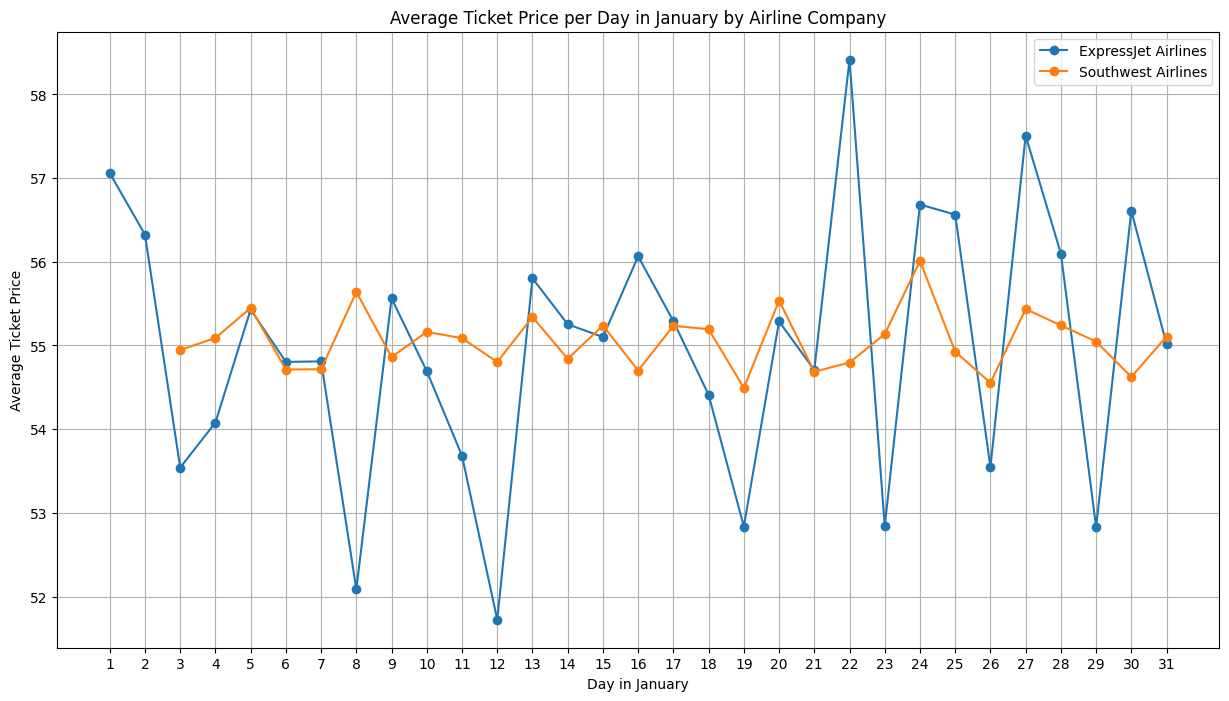

In [36]:
# Execute the query
query = """
SELECT 
  EXTRACT(DAY FROM departure_time) AS day,
  AVG(ticket_price) AS avg_ticket_price,
  ac.airline_company_name
FROM ticket t
JOIN airline_company ac ON t.airline_company = ac.airline_company_id
WHERE EXTRACT(MONTH FROM departure_time) = 1
GROUP BY day, ac.airline_company_name
ORDER BY ac.airline_company_name, day;
"""
df = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Ensure the 'day' column is of integer type
df['day'] = df['day'].astype(int)

# Plot the results for each airline company
plt.figure(figsize=(15, 8))
for airline_name in df['airline_company_name'].unique():
    airline_df = df[df['airline_company_name'] == airline_name]
    plt.plot(airline_df['day'], airline_df['avg_ticket_price'], marker='o', label=airline_name)

plt.title('Average Ticket Price per Day in January by Airline Company')
plt.xlabel('Day in January')
plt.ylabel('Average Ticket Price')
plt.xticks(range(1, 32))
plt.legend()
plt.grid(True)
plt.show()

/var/folders/sf/8z2q6s016vq62qbq8kwlx8580000gn/T/ipykernel_71180/2582206792.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


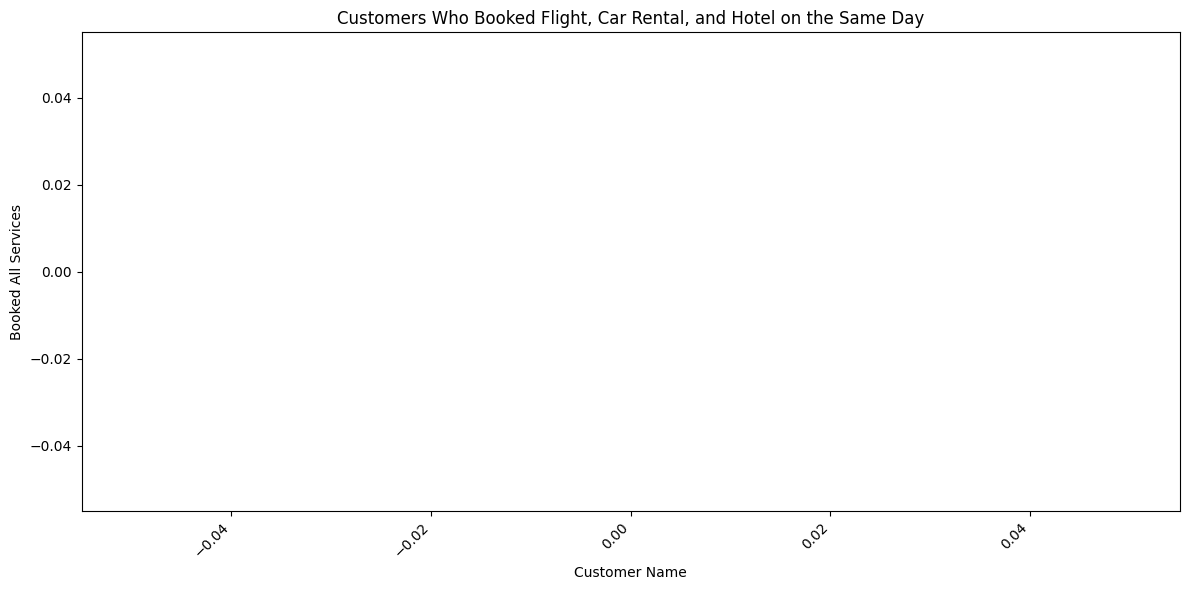

In [38]:
# Query to fetch customers who booked a flight, car rental, and hotel on the same day
query = """
SELECT 
  c.customer_id,
  c.first_name || ' ' || c.last_name AS full_name
FROM customer c
JOIN booking_customer bc ON c.customer_id = bc.customer_id
JOIN booking b ON bc.booking_id = b.booking_id
JOIN booking_ticket bt ON b.booking_id = bt.booking_id
JOIN booking_car_rental_order bcr ON b.booking_id = bcr.booking_id
JOIN booking_hotel_order bh ON b.booking_id = bh.booking_id
JOIN ticket t ON bt.ticket_id = t.ticket_id
JOIN car_rental_order cr ON bcr.car_rental_order_id = cr.car_rental_order_id
JOIN hotel_order h ON bh.hotel_order_id = h.hotel_order_id
WHERE 
  DATE(t.departure_time) = DATE(cr.pick_up_time)
  AND DATE(cr.pick_up_time) = DATE(h.check_in_date)
GROUP BY c.customer_id, c.first_name, c.last_name;
"""

# Read the result into a Pandas DataFrame
df = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Plot a bar chart to visualize the customers
plt.figure(figsize=(12, 6))
plt.bar(df['full_name'], [1] * len(df))  # All bars have the same height of 1 as we are only visualizing presence
plt.xlabel('Customer Name')
plt.ylabel('Booked All Services')
plt.title('Customers Who Booked Flight, Car Rental, and Hotel on the Same Day')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/sf/8z2q6s016vq62qbq8kwlx8580000gn/T/ipykernel_71180/2311652909.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


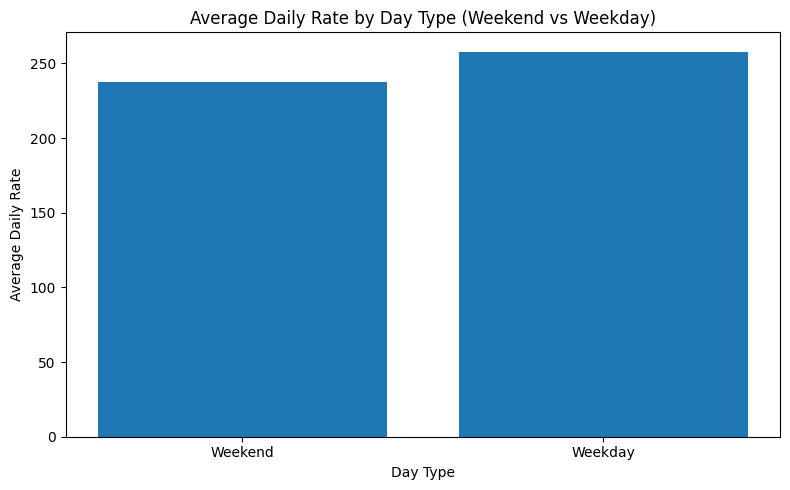

In [40]:
# Query to calculate the average daily rate for weekends and weekdays
query = """
SELECT 
  CASE
    WHEN EXTRACT(DOW FROM check_in_date) IN (0, 6) THEN 'Weekend'
    ELSE 'Weekday'
  END AS day_type,
  AVG(daily_rate) AS avg_rate
FROM hotel_order
GROUP BY day_type;
"""

# Read the result into a Pandas DataFrame
df = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Plot a bar chart to visualize the results
plt.figure(figsize=(8, 5))
plt.bar(df['day_type'], df['avg_rate'])
plt.xlabel('Day Type')
plt.ylabel('Average Daily Rate')
plt.title('Average Daily Rate by Day Type (Weekend vs Weekday)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/var/folders/sf/8z2q6s016vq62qbq8kwlx8580000gn/T/ipykernel_71180/988877290.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


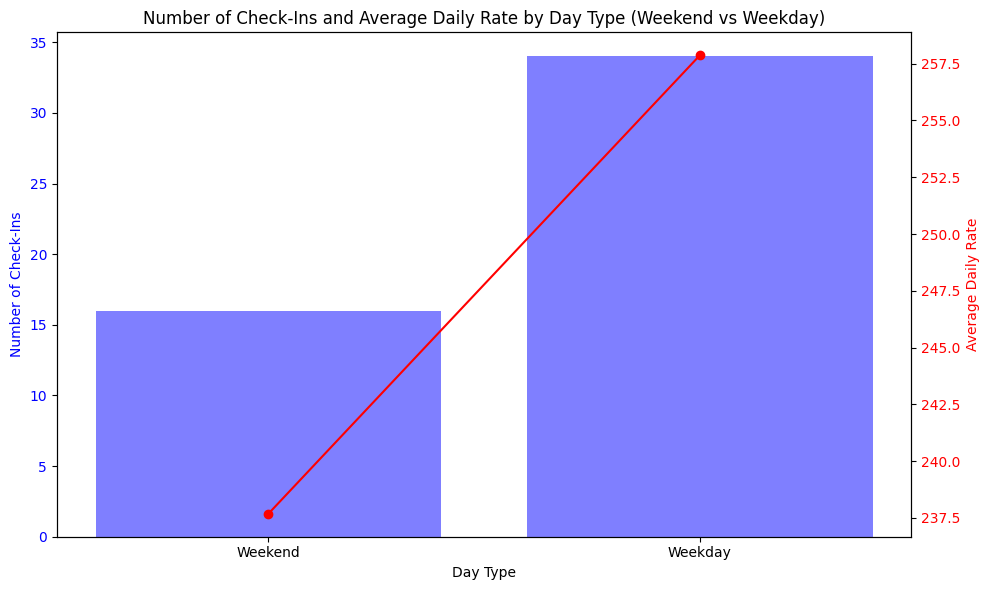

In [42]:
# Query to count the number of check-ins and calculate the average daily rate for weekends and weekdays
query = """
SELECT 
  CASE
    WHEN EXTRACT(DOW FROM check_in_date) IN (0, 6) THEN 'Weekend'
    ELSE 'Weekday'
  END AS day_type,
  COUNT(*) AS check_in_count,
  AVG(daily_rate) AS avg_rate
FROM hotel_order
GROUP BY day_type;
"""

# Read the result into a Pandas DataFrame
df = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Create a figure and a set of subplots (two axes)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create the bar chart for check-in counts
ax1.bar(df['day_type'], df['check_in_count'], color='b', alpha=0.5)
ax1.set_xlabel('Day Type')
ax1.set_ylabel('Number of Check-Ins', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot the average daily rate
ax2 = ax1.twinx()
ax2.plot(df['day_type'], df['avg_rate'], color='r', marker='o')
ax2.set_ylabel('Average Daily Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Number of Check-Ins and Average Daily Rate by Day Type (Weekend vs Weekday)')
plt.tight_layout()
plt.show()